In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

# always useful
import seaborn as sns
import numpy as np
import scipy as sp
import pandas as pd
from scipy import linalg as la
from scipy import stats
import math



In [48]:
import numpy.random as npr
npr.seed(2407)

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [64]:
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = np.random.normal(0, 3, N)+x1
x3 = 2*x1+x2

df = pd.DataFrame([x1, x2, x3])
df = df.T
df.columns =['f1','f2','f3']
df


,f1,f2,f3
0,-0.528816,5.044986,3.987355
1,-0.287415,-1.125945,-1.700775
2,0.796161,-3.550316,-1.957993
3,-0.460100,-1.707899,-2.628098
4,0.451270,-2.754254,-1.851713
...,...,...,...
995,-2.607755,-4.786000,-10.001510
996,-0.547017,-0.283379,-1.377413
997,1.530513,3.519870,6.580896
998,-0.500646,-1.626819,-2.628110


In [65]:
cov = np.cov(df.T)
#print(cov)
l, V = la.eig(cov)
print("Eigenvalues: ", l)
print("Eigenvectors: \n", V)

Eigenvalues:  [ 2.76199205e+01+0.j -1.07457269e-15+0.j  1.85968907e+00+0.j]
Eigenvectors: 
 [[-0.12526664 -0.81649658  0.56359702]
 [-0.56499593 -0.40824829 -0.71701669]
 [-0.8155292   0.40824829  0.41017735]]


In [66]:
VV, spect, Vt = la.svd(df.T)
ll = spect**2/(N-1)


print("Eigenvalues with SVD: ", ll)
print("Eigenvectors with SVD: \n", VV)

#ll.sort()
#l.sort()

#print(ll,"\n",l)


Eigenvalues with SVD:  [2.76360419e+01 1.85986117e+00 2.67768386e-30]
Eigenvectors with SVD: 
 [[-0.1252302   0.56360512 -0.81649658]
 [-0.56504227 -0.71698017 -0.40824829]
 [-0.81550268  0.41023007  0.40824829]]


In [52]:
print("Weighs of the features: f1: ",ll[0]/np.sum(ll), "f2: ", ll[1]/np.sum(ll), "f3: ",ll[2]/np.sum(ll))

Weighs of the features: f1:  0.9412598208256862 f2:  0.05874017917431388 f3:  1.984519644899653e-32


In [67]:
df1 = df.dot(V)
df1.columns =['f1','f2','f3']



VV, spect, Vt = la.svd(df1.T)
ll = spect**2/(N-1)


print("Eigenvalues with SVD: ", ll)
print("Eigenvectors with SVD: \n", VV)

df1

Eigenvalues with SVD:  [2.76360419e+01 1.85986117e+00 1.80455253e-32]
Eigenvectors with SVD: 
 [[-9.99999998e-01  6.46396289e-05  6.11840785e-17]
 [-6.11974654e-17  2.11099959e-21 -1.00000000e+00]
 [-6.46396289e-05 -9.99999998e-01  2.22046449e-16]]


,f1,f2,f3
0,-6.035958,-6.472703e-16,-2.279856
1,2.059190,1.052439e-16,-0.052284
2,3.502982,3.527083e-16,2.191226
3,3.165882,3.308677e-16,-0.112705
4,3.009739,2.399789e-16,1.469650
...,...,...,...
995,11.187258,4.640839e-16,-2.140474
996,1.351951,4.064305e-17,-0.670094
997,-7.547348,-2.088464e-17,1.038121
998,3.125161,2.702641e-17,-0.193697


Text(0, 0.5, 'x2')

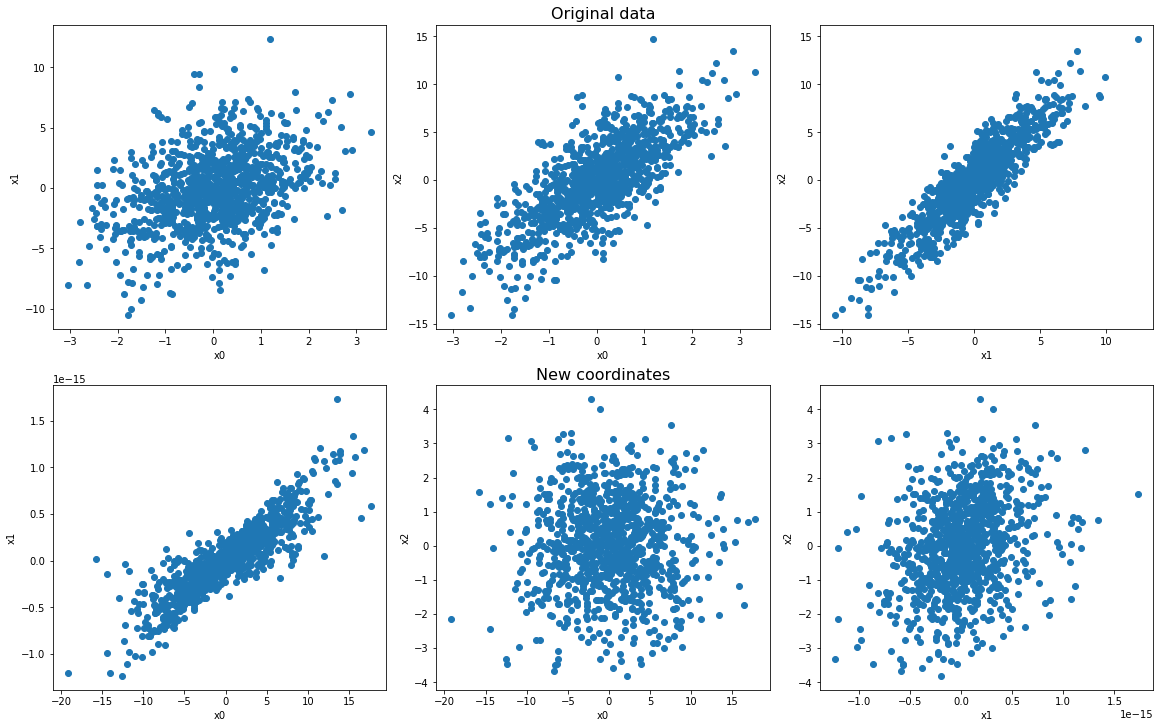

In [68]:
fig, ax = plt.subplots(2, 3, constrained_layout=True)
fig.set_size_inches(16, 10)
ax[0,1].set_title("Original data", fontsize=16)
ax[1,1].set_title("New coordinates", fontsize=16)

ax[0,0].scatter(df["f1"], df["f2"])
ax[0,0].set_xlabel("x0")
ax[0,0].set_ylabel("x1")

ax[0,1].scatter(df["f1"], df["f3"])
ax[0,1].set_xlabel("x0")
ax[0,1].set_ylabel("x2")

ax[0,2].scatter(df["f2"], df["f3"])
ax[0,2].set_xlabel("x1")
ax[0,2].set_ylabel("x2")
################################################

ax[1,0].scatter(df1["f1"], df1["f2"])
ax[1,0].set_xlabel("x0")
ax[1,0].set_ylabel("x1")


ax[1,1].scatter(df1["f1"], df1["f3"])
ax[1,1].set_xlabel("x0")
ax[1,1].set_ylabel("x2")

ax[1,2].scatter(df1["f2"], df1["f3"])
ax[1,2].set_xlabel("x1")
ax[1,2].set_ylabel("x2")


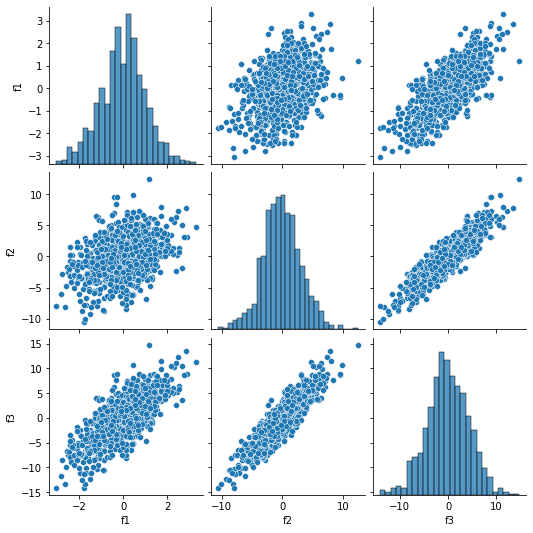

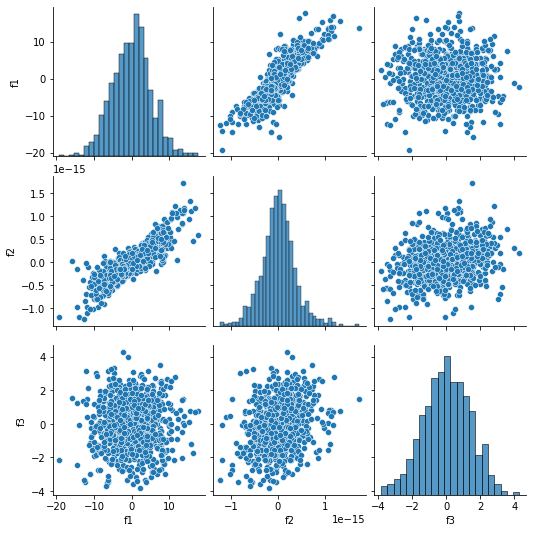

In [69]:
sns.pairplot(df)
sns.pairplot(df1)

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [70]:
# create 10 variables from normal distribution for noise
for i in range(10):
    llave = "wn"+str(i)
    df1[llave] =  np.random.normal(0, 1, 1000)/50

df1


,f1,f2,f3,wn0,wn1,wn2,wn3,wn4,wn5,wn6,wn7,wn8,wn9
0,-6.035958,-6.472703e-16,-2.279856,-0.014802,0.006100,-0.008222,0.014321,0.014091,-0.018105,-0.023723,0.012551,0.015586,0.010676
1,2.059190,1.052439e-16,-0.052284,0.001798,0.030492,0.007239,-0.032598,-0.008188,-0.035527,-0.002933,-0.006950,-0.014100,-0.009735
2,3.502982,3.527083e-16,2.191226,0.005382,0.037521,0.037974,0.004248,0.032935,-0.014176,0.003226,-0.026882,0.020025,0.013760
3,3.165882,3.308677e-16,-0.112705,-0.015164,-0.002581,0.036439,0.026004,0.000953,0.017822,0.022999,0.001232,-0.042771,-0.014502
4,3.009739,2.399789e-16,1.469650,-0.018796,-0.002243,0.014570,0.014486,0.012591,0.012461,-0.004727,-0.011498,0.028871,0.013814
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11.187258,4.640839e-16,-2.140474,0.013407,0.004908,0.012947,0.021882,-0.052521,-0.010798,-0.027130,0.003216,-0.023208,0.016462
996,1.351951,4.064305e-17,-0.670094,-0.000035,-0.019534,-0.005292,-0.032679,0.009914,0.023831,0.016017,-0.010742,-0.013365,0.033161
997,-7.547348,-2.088464e-17,1.038121,0.003188,-0.001093,0.000187,0.006140,-0.027297,-0.013251,-0.024015,0.036202,-0.014905,-0.025069
998,3.125161,2.702641e-17,-0.193697,-0.019735,-0.015040,-0.004097,0.005781,-0.004878,-0.026003,0.001596,0.037052,0.017164,0.012144


In [72]:
cov = np.cov(df1.T);
#print(cov)
l, V = la.eig(cov);
print("Eigenvalues: ", l)
print("Eigenvectors: \n", V)

Eigenvalues:  [ 2.76199239e+01+0.j  1.85969489e+00+0.j -2.16840434e-19+0.j
  4.59140135e-04+0.j  4.42913244e-04+0.j  3.56049144e-04+0.j
  4.22977167e-04+0.j  3.72786670e-04+0.j  3.79727723e-04+0.j
  3.84919146e-04+0.j  4.08759930e-04+0.j  4.03104561e-04+0.j
  4.00185990e-04+0.j]
Eigenvectors: 
 [[ 9.99999938e-01 -7.19204863e-08 -6.10644192e-17  1.66402156e-04
   6.87562733e-05  6.37008662e-05 -1.27102280e-04  2.39206284e-05
  -5.66537967e-05  1.87862091e-04 -5.18961301e-05  1.66218325e-04
   3.23272457e-05]
 [ 6.11477839e-17 -8.73309017e-17  1.00000000e+00  2.81341944e-15
   6.78567474e-16 -1.81417490e-15 -4.78005907e-16 -9.01287249e-16
   1.20987767e-15 -2.42547279e-15 -7.02909928e-16 -5.66936951e-17
   3.71486932e-16]
 [-4.84132767e-09 -9.99998435e-01 -7.17048860e-17 -3.34635648e-04
   3.54192414e-04  7.41509104e-04  2.31341688e-04  4.09951201e-04
  -1.16665739e-03 -2.61110260e-04 -5.55438630e-05 -3.55466416e-04
  -7.49375326e-04]
 [ 1.71719935e-04 -8.00223813e-04 -4.60688261e-16 -1.

In [78]:
print("Weighs of the features:")

for j in range(13):
    turn = "f" + str(j+1)
    print(turn,np.abs(np.real(l[j]/np.sum(l))))


Weighs of the features:
f1 0.9367878300659349
f2 0.06307546488582028
f3 7.354599554303785e-21
f4 1.55727036755682e-05
f5 1.5022334516304355e-05
f6 1.2076155822298553e-05
f7 1.4346160551799409e-05
f8 1.2643844231891327e-05
f9 1.2879264662328836e-05
f10 1.3055342665521307e-05
f11 1.3863953019261573e-05
f12 1.3672139280932932e-05
f13 1.3573149818864134e-05


In [77]:

df2 = df1.dot(V)
df2.columns =['f1','f2','f3','wn0','wn1','wn2','wn3','wn4','wn5','wn6','wn7','wn8','wn9']

df2

,f1,f2,f3,wn0,wn1,wn2,wn3,wn4,wn5,wn6,wn7,wn8,wn9
0,-6.035965,2.279821,-3.640541e-17,0.022444,0.005662,-0.026704,-0.014268,0.000678,0.007647,0.021710,0.012877,0.000805,-0.007324
1,2.059179,0.052276,-2.180875e-17,0.006309,0.001271,-0.003989,0.025810,-0.006705,-0.017928,0.019152,-0.023315,0.039847,0.013512
2,3.502982,-2.191225,2.337644e-17,-0.037649,0.023702,-0.021497,0.020963,0.004430,0.009413,0.043318,-0.010364,0.007660,-0.021812
3,3.165880,0.112747,8.264768e-17,-0.028049,0.019020,0.043527,-0.011342,0.002128,-0.011483,0.018131,-0.000069,-0.024047,0.030264
4,3.009743,-1.469624,-8.082260e-18,-0.011443,0.017265,-0.006335,-0.001817,0.003784,0.002503,0.010362,0.023230,-0.013537,-0.031686
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11.187254,2.140485,-5.486943e-17,0.031241,0.032499,-0.003516,0.000042,-0.030802,-0.018756,-0.006755,-0.033631,-0.023409,0.015764
996,1.351955,0.670155,-1.108433e-17,-0.015622,-0.000986,0.011267,-0.007571,0.039955,-0.010205,-0.030376,-0.013798,0.008884,-0.019502
997,-7.547352,-1.038159,3.767230e-16,0.035202,0.004555,-0.001619,0.005668,-0.016727,-0.008021,-0.004545,0.006675,-0.007513,0.042382
998,3.125150,0.193657,-8.273424e-17,0.027701,0.023270,-0.006725,-0.026637,-0.003932,0.012816,-0.003505,0.022482,0.021845,0.004891


3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [15]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/

Attributes:

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

In [16]:
columns =['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']

magic = pd.read_csv('/Users/gianmarco/data/magic04.data',index_col = False,names = columns)
##Filtering only by gamma signals
magic_g = magic[magic["class"] == "g"]
magic_h = magic[magic["class"] == "h"]
magic_g


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370,g
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980,g
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810,g
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090,g


In [17]:
magic_g = magic_g.drop(["class"],axis = 1)
magic_g


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
12327,12.8703,11.4444,2.3811,0.7360,0.3805,-15.0946,5.3032,11.6208,21.0120,204.0370
12328,26.8595,20.5946,2.8754,0.3438,0.2152,-3.4556,-20.0014,-9.0535,3.9848,205.4980
12329,22.0913,10.8949,2.2945,0.5381,0.2919,15.2776,18.2296,7.3975,21.0680,123.2810
12330,56.2216,18.7019,2.9297,0.2516,0.1393,96.5758,-41.2969,11.3764,5.9110,197.2090


In [21]:
cov = np.cov(magic_g.T)
#print(cov)
l, V = la.eig(cov)
print("Eigenvalues: ", l)
print("Eigenvectors: \n", V)

Eigenvalues:  [5.53585185e+03+0.j 1.68762472e+03+0.j 9.89519286e+02+0.j
 3.79447675e+02+0.j 2.62426537e+02+0.j 1.83690249e+02+0.j
 3.86358142e+01+0.j 4.25672089e-02+0.j 9.16817511e-03+0.j
 3.13024820e-04+0.j]
Eigenvectors: 
 [[-2.43290880e-01 -1.14668932e-01  3.54404456e-01  3.77003802e-01
  -7.66203256e-01  2.55359499e-02  2.68675631e-01  4.38082814e-03
  -9.45186748e-04  6.10067059e-05]
 [-5.53852740e-02 -4.76517386e-02  9.12796755e-02  9.46128722e-02
  -2.24396721e-01 -2.26976465e-02 -9.61971528e-01  3.34622121e-02
   4.42711793e-04 -1.58292993e-05]
 [-3.34753835e-03 -3.34727075e-03  5.46830728e-03  6.56677227e-03
  -7.84768673e-03 -3.33159001e-04 -2.92740673e-02 -9.33487239e-01
  -3.56518292e-01  2.19585418e-02]
 [ 1.06556407e-03  1.15610036e-03 -1.94034281e-03 -3.38648741e-03
   2.88042855e-03  5.66322941e-05  9.07999434e-03  3.09199967e-01
  -7.76722999e-01  5.48624017e-01]
 [ 6.01186117e-04  6.74746085e-04 -1.11397435e-03 -1.96138098e-03
   1.65622383e-03  2.78833076e-05  5.2281

Weighs of the features:
fLength 0.6098601408670528
fWidth 0.1859180978800837
fSize 0.10901093229715013
fConc 0.04180206022353402
fConc1 0.028910362703496343
fAsym 0.020236336523585717
fM3Long 0.004256335563724629
fM3Trans 4.6894398068245e-06
fAlpha 1.0100170156547233e-06
fDist 3.448455016576935e-08


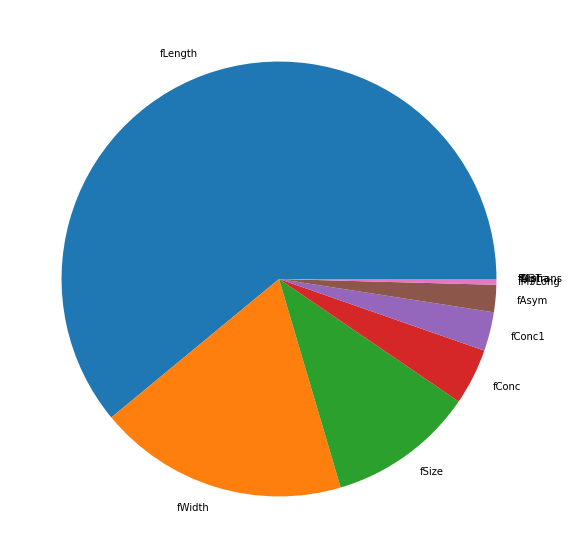

In [36]:
print("Weighs of the features:")
fpie = []
for j in range(10):
    turn = "f" + str(j+1)
    print(columns[j],np.real(l[j]/np.sum(l)))
    fpie.append(np.real(l[j]/np.sum(l)))

plt.pie(fpie, labels = columns[0:10]);



fig = plt.gcf()
fig.set_size_inches(10,10)
#plt.legend()
plt.show()